In [3]:
from sklearn import datasets
boston = datasets.load_boston()
print(boston.keys())
print(boston.data.shape,boston.target.shape)
print(boston.feature_names)
print(boston.DESCR)
print(boston.filename)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
(506, 13) (506,)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to f

In [4]:
from sklearn import datasets
iris = datasets.load_iris()
print(iris.data.shape,iris.target.shape)
print(iris.feature_names)

(150, 4) (150,)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [7]:
from sklearn import datasets
cancer = datasets.load_breast_cancer()
print(cancer["feature_names"])
X = cancer["data"]
Y = cancer["target"]
print(cancer["target_names"])

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


In [9]:
from sklearn import datasets
data = datasets.fetch_california_housing(data_home=None,download_if_missing=True,return_X_y=True)
x = data[0]
y = data[1]
print(len(x),len(y),len(x[0]))

20640 20640 8


corrcoef: 0.8510328339074453 RMSE: 4.56286388439158


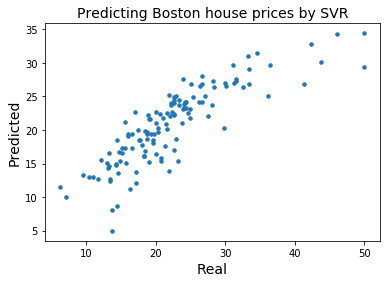

In [10]:
default_encoding = "utf-8"
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

boston = datasets.load_boston()
X = boston["data"]
y = boston["target"]
# 特征归一化
scalar = MinMaxScaler()
X = scalar.fit_transform(X)
# 划分训练集和测试集
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 30) # 测试集样本占比25%
# 模型训练
model = SVR("linear")
SVR_trained = model.fit(X_train,y_train)
# 模型预测
y_pred =SVR_trained.predict(X_test)
# 模型评估
rmse = np.sqrt(mean_squared_error(y_test,y_pred)) # 计算真实值和预测值之间的RMSE
r = np.corrcoef(y_test,y_pred)[0][1] # 计算真实值和预测值之间的皮尔森相关系数
print("corrcoef:",r,"RMSE:",rmse)
# 结果可视化
plt.scatter(y_test,y_pred,s=12)
plt.title("Predicting Boston house prices by SVR",size = 14)
plt.xlabel('Real',size=14)
plt.ylabel('Predicted',size=14)
plt.show()

C:\Users\jy-3\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


corrcoef: 0.908470277104676 RMSE: 3.353414188230016


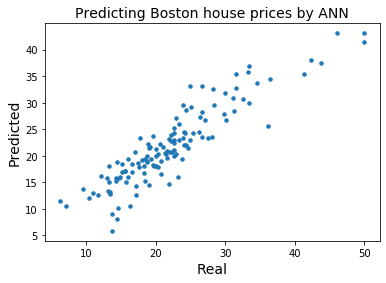

In [12]:
# ANN预测
default_encoding = "utf-8"
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
# from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

boston = datasets.load_boston()
X = boston["data"]
y = boston["target"]
# 特征归一化
scalar = MinMaxScaler()
X = scalar.fit_transform(X)
# 划分训练集和测试集
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 30) # 测试集样本占比25%
# 模型训练
# model = SVR("linear")
# SVR_trained = model.fit(X_train,y_train)
ANN_trained = MLPRegressor(hidden_layer_sizes=(100,),max_iter=1500,activation='relu').fit(X_train,y_train)
# 模型预测
y_pred =ANN_trained.predict(X_test)
# 模型评估
rmse = np.sqrt(mean_squared_error(y_test,y_pred)) # 计算真实值和预测值之间的RMSE
r = np.corrcoef(y_test,y_pred)[0][1] # 计算真实值和预测值之间的皮尔森相关系数
print("corrcoef:",r,"RMSE:",rmse)
# 结果可视化
plt.scatter(y_test,y_pred,s=12)
plt.title("Predicting Boston house prices by ANN",size = 14)
plt.xlabel('Real',size=14)
plt.ylabel('Predicted',size=14)
plt.show()

corrcoef: 0.8502125502060474 RMSE: 4.343665131159807


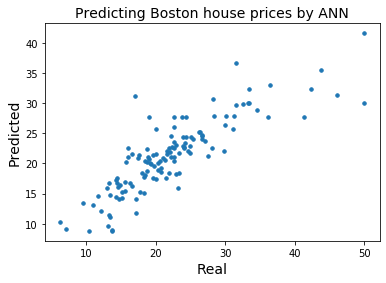

In [15]:
# kNN预测
default_encoding = "utf-8"
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
# from sklearn.neural_network import MLPRegressor
# from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

boston = datasets.load_boston()
X = boston["data"]
y = boston["target"]
# 特征归一化
scalar = MinMaxScaler()
X = scalar.fit_transform(X)
# 划分训练集和测试集
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 30) # 测试集样本占比25%
# 模型训练
# model = SVR("linear")
# SVR_trained = model.fit(X_train,y_train)
# ANN_trained = MLPRegressor(hidden_layer_sizes=(100,),max_iter=1500,activation='relu').fit(X_train,y_train)
neigh = KNeighborsRegressor(n_neighbors = 5,p = 2, metric = 'minkowski') # Euclidean 
neigh.fit(X_train,y_train)
# 模型预测
y_pred =neigh.predict(X_test)
# 模型评估
rmse = np.sqrt(mean_squared_error(y_test,y_pred)) # 计算真实值和预测值之间的RMSE
r = np.corrcoef(y_test,y_pred)[0][1] # 计算真实值和预测值之间的皮尔森相关系数
print("corrcoef:",r,"RMSE:",rmse)
# 结果可视化
plt.scatter(y_test,y_pred,s=12)
plt.title("Predicting Boston house prices by ANN",size = 14)
plt.xlabel('Real',size=14)
plt.ylabel('Predicted',size=14)
plt.show()

In [16]:
# SVM预测
default_encoding = "utf-8"
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
# from sklearn.neural_network import MLPRegressor
# from sklearn.svm import SVR
# from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC
# from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

iris = datasets.load_iris()
X = iris["data"]
y = iris["target"]
# 特征归一化
scalar = MinMaxScaler()
X = scalar.fit_transform(X)
# 划分训练集和测试集
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 30) # 测试集样本占比25%
# 模型训练
# model = SVR("linear")
# SVR_trained = model.fit(X_train,y_train)
# ANN_trained = MLPRegressor(hidden_layer_sizes=(100,),max_iter=1500,activation='relu').fit(X_train,y_train)
#neigh = KNeighborsRegressor(n_neighbors = 5,p = 2, metric = 'minkowski') # Euclidean 
#neigh.fit(X_train,y_train)
svc = SVC(kernel='rbf') # kernel:'linear','poly','rbf','sigmoid','precomputed',default='rbf'
svc.fit(X_train,y_train)
# 模型预测
y_pred =svc.predict(X_test)
# 模型评估
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)

0.9736842105263158


0.9790209790209791 0.967741935483871 1.0 0.9836065573770492 0.9716981132075472


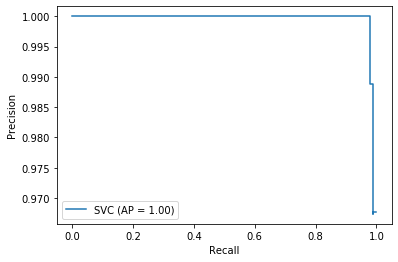

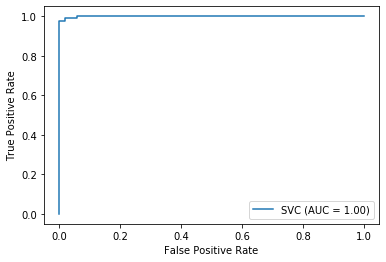

In [24]:
default_encoding = "utf-8"
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
# from sklearn.neural_network import MLPRegressor
# from sklearn.svm import SVR
# from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score,jaccard_score,precision_score,recall_score,f1_score,roc_auc_score,plot_precision_recall_curve,plot_roc_curve

cancer = datasets.load_breast_cancer()
X = cancer["data"]
y = cancer["target"]
# 特征归一化
scalar = MinMaxScaler()
X = scalar.fit_transform(X)
# 划分训练集和测试集
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 0) # 测试集样本占比25%
# 模型训练
svc = SVC(kernel='linear') # kernel:'linear','poly','rbf','sigmoid','precomputed',default='rbf'
svc.fit(X,y)
# 模型预测
y_pred =svc.predict(X_test)
# 模型评估
accuracy = accuracy_score(y_test,y_pred)
jaccard = jaccard_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
auc = roc_auc_score(y_test,y_pred)
print(accuracy,jaccard,recall,f1,auc)

plot_precision_recall_curve(svc,X_test,y_test)
plt.show()
plot_roc_curve(svc,X_test,y_test)
plt.show()

In [25]:
default_encoding = "utf-8"
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
# from sklearn.neural_network import MLPRegressor
# from sklearn.svm import SVR
# from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
# from sklearn.svm import SVC
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

iris = datasets.load_iris()
X = iris["data"]
y = iris["target"]
# 特征归一化
scalar = MinMaxScaler()
X = scalar.fit_transform(X)
# 划分训练集和测试集
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 30) # 测试集样本占比25%
# 模型训练
#svc = SVC(kernel='linear') # kernel:'linear','poly','rbf','sigmoid','precomputed',default='rbf'
#svc.fit(X,y)
gnb = GaussianNB()
gnb.fit(X_train,y_train)
# 模型预测
y_pred =gnb.predict(X_test)
# 模型评估
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)

0.9473684210526315


In [27]:
# kNN分类 
default_encoding = "utf-8"
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
# from sklearn.neural_network import MLPRegressor
# from sklearn.svm import SVR
# from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

iris = datasets.load_iris()
X = iris["data"]
y = iris["target"]
# 特征归一化
scalar = MinMaxScaler()
X = scalar.fit_transform(X)
# 划分训练集和测试集
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 30) # 测试集样本占比25%
# 模型训练
#svc = SVC(kernel='linear') # kernel:'linear','poly','rbf','sigmoid','precomputed',default='rbf'
#svc.fit(X,y)
#gnb = GaussianNB()
#gnb.fit(X_train,y_train)
neigh = KNeighborsClassifier(n_neighbors = 3)
neigh.fit(X,y)
# 模型预测
y_pred =neigh.predict(X_test)
# 模型评估
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)

0.9473684210526315


ValueError: 'c' argument has 20640 elements, which is not acceptable for use with 'x' with size 1500, 'y' with size 1500.

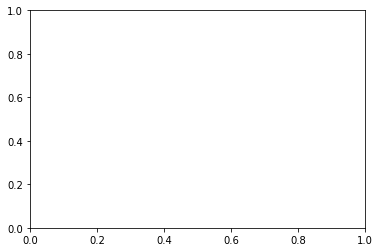

In [30]:
# Kmeans聚类 
default_encoding = "utf-8"
#import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
# 生成样本
X,y = make_blobs(n_samples=1500,centers=4,n_features=2,random_state=170)
kmeans = KMeans(n_clusters=4,random_state=170).fit(x)
labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_
# 作图展示
plt.scatter(X[:,0],X[:,1],c = labels)
plt.title("Kmeans")
plt.show()

In [ ]:
# 
from numpy import *
import operator
from os import listdir

#基本KNN分类
def classify0(inX, dataSet, labels, k):
    dataSetSize = dataSet.shape[0]
    diffMat = tile(inX, (dataSetSize,1)) - dataSet
    sqDiffMat = diffMat**2
    sqDistances = sqDiffMat.sum(axis=1)
    distances = sqDistances**0.5
    sortedDistIndicies = distances.argsort()     
    classCount={}          
    for i in range(k):
        voteIlabel = labels[sortedDistIndicies[i]]
        classCount[voteIlabel] = classCount.get(voteIlabel,0) + 1
    sortedClassCount = sorted(iter(classCount.items()), key=operator.itemgetter(1), reverse=True)
    return sortedClassCount[0][0]

def createDataSet():
    group = array([[1.0,1.1],[1.0,1.0],[0,0],[0,0.1]])
    labels = ['A','A','B','B']
    return group, labels



#交友网站数据测试
def datingClassTest():
    hoRatio = 0.50      #hold out 10%
    datingDataMat,datingLabels = file2matrix('datingTestSet2.txt')       #load data setfrom file
    normMat, ranges, minVals = autoNorm(datingDataMat)
    m = normMat.shape[0]
    numTestVecs = int(m*hoRatio)
    errorCount = 0.0
    for i in range(numTestVecs):
        classifierResult = classify0(normMat[i,:],normMat[numTestVecs:m,:],datingLabels[numTestVecs:m],3)
        print("the classifier came back with: %d, the real answer is: %d" % (classifierResult, datingLabels[i]))
        if (classifierResult != datingLabels[i]): errorCount += 1.0
    print("the total number of samples: %i" % m)
    print("the number of test samples: %i" % numTestVecs)
    print("the number of errors: %f" % errorCount)
    print("the total error rate is: %f" % (errorCount/float(numTestVecs)))
    

def file2matrix(filename):
    fr = open(filename)
    numberOfLines = len(fr.readlines())         #get the number of lines in the file
    returnMat = zeros((numberOfLines,3))        #prepare matrix to return
    classLabelVector = []                       #prepare labels return   
    fr = open(filename)
    index = 0
    for line in fr.readlines():
        line = line.strip()
        listFromLine = line.split('\t')
        returnMat[index,:] = listFromLine[0:3]
        classLabelVector.append(int(listFromLine[-1]))
        index += 1
    return returnMat,classLabelVector
    
def autoNorm(dataSet):
    minVals = dataSet.min(0)
    maxVals = dataSet.max(0)
    ranges = maxVals - minVals
    normDataSet = zeros(shape(dataSet))
    m = dataSet.shape[0]
    normDataSet = dataSet - tile(minVals, (m,1))
    normDataSet = normDataSet/tile(ranges, (m,1))   #element wise divide
    return normDataSet, ranges, minVals    
    
    
    

#手写数字识别
def handwritingClassTest():
    hwLabels = []
    trainingFileList = listdir('trainingDigits')           #load the training set
    m = len(trainingFileList)
    trainingMat = zeros((m,1024))
    for i in range(m):
        fileNameStr = trainingFileList[i]
        fileStr = fileNameStr.split('.')[0]     #take off .txt
        classNumStr = int(fileStr.split('_')[0])
        hwLabels.append(classNumStr)
        trainingMat[i,:] = img2vector('trainingDigits/%s' % fileNameStr)
    testFileList = listdir('testDigits')        #iterate through the test set
    errorCount = 0.0
    mTest = len(testFileList)
    for i in range(mTest):
        fileNameStr = testFileList[i]
        fileStr = fileNameStr.split('.')[0]     #take off .txt
        classNumStr = int(fileStr.split('_')[0])
        vectorUnderTest = img2vector('testDigits/%s' % fileNameStr)
        classifierResult = classify0(vectorUnderTest, trainingMat, hwLabels, 3)
        print("the classifier came back with: %d, the real answer is: %d" % (classifierResult, classNumStr))
        if (classifierResult != classNumStr): errorCount += 1.0
    print("\nthe total number of errors is: %d" % errorCount)
    print("\nthe total error rate is: %f" % (errorCount/float(mTest)))
    
    
def img2vector(filename):
    returnVect = zeros((1,1024))
    fr = open(filename)
    for i in range(32):
        lineStr = fr.readline()
        for j in range(32):
            returnVect[0,32*i+j] = int(lineStr[j])
    return returnVect


In [ ]:
from numpy import *

def loadDataSet():
    postingList=[['my', 'dog', 'has', 'flea', 'problems', 'help', 'please'],
                 ['maybe', 'not', 'take', 'him', 'to', 'dog', 'park', 'stupid'],
                 ['my', 'dalmation', 'is', 'so', 'cute', 'I', 'love', 'him'],
                 ['stop', 'posting', 'stupid', 'worthless', 'garbage'],
                 ['mr', 'licks', 'ate', 'my', 'steak', 'how', 'to', 'stop', 'him'],
                 ['quit', 'buying', 'worthless', 'dog', 'food', 'stupid']]
    classVec = [0,1,0,1,0,1]    #1 is abusive, 0 not
    return postingList,classVec
                 
def createVocabList(dataSet):
    vocabSet = set([])  #create empty set
    for document in dataSet:
        vocabSet = vocabSet | set(document) #union of the two sets
    return list(vocabSet)

def setOfWords2Vec(vocabList, inputSet):
    returnVec = [0]*len(vocabList)
    for word in inputSet:
        if word in vocabList:
            returnVec[vocabList.index(word)] = 1
        else: print("the word: %s is not in my Vocabulary!" % word)
    return returnVec

def trainNB0(trainMatrix,trainCategory):
    numTrainDocs = len(trainMatrix)
    numWords = len(trainMatrix[0])
    pAbusive = sum(trainCategory)/float(numTrainDocs)
    p0Num = zeros(numWords); p1Num = zeros(numWords)      #change to ones() 
    p0Denom = 0; p1Denom = 0                        #change to 2.0
    for i in range(numTrainDocs):
        if trainCategory[i] == 1:
            p1Num += trainMatrix[i]
            p1Denom += sum(trainMatrix[i])
        else:
            p0Num += trainMatrix[i]
            p0Denom += sum(trainMatrix[i])
    p1Vect = p1Num/p1Denom         #change to log()
    p0Vect = p0Num/p0Denom         #change to log()
    return p0Vect,p1Vect,pAbusive


def classifyNB(vec2Classify, p0Vec, p1Vec, pClass1):
    p1 = sum(vec2Classify * p1Vec) + log(pClass1)    #element-wise mult
    p0 = sum(vec2Classify * p0Vec) + log(1.0 - pClass1)
    if p1 > p0:
        return 1
    else: 
        return 0
    
def bagOfWords2VecMN(vocabList, inputSet):
    returnVec = [0]*len(vocabList)
    for word in inputSet:
        if word in vocabList:
            returnVec[vocabList.index(word)] += 1
    return returnVec

def testingNB():
    listOPosts,listClasses = loadDataSet()
    myVocabList = createVocabList(listOPosts)
    trainMat=[]
    for postinDoc in listOPosts:
        trainMat.append(setOfWords2Vec(myVocabList, postinDoc))
    p0V,p1V,pAb = trainNB0(array(trainMat),array(listClasses))
    testEntry = ['love', 'my', 'dalmation']
    thisDoc = array(setOfWords2Vec(myVocabList, testEntry))
    print(testEntry,'classified as: ',classifyNB(thisDoc,p0V,p1V,pAb))
    testEntry = ['stupid', 'garbage']
    thisDoc = array(setOfWords2Vec(myVocabList, testEntry))
    print(testEntry,'classified as: ',classifyNB(thisDoc,p0V,p1V,pAb))

def textParse(bigString):    #input is big string, #output is word list
    import re
    listOfTokens = re.split(r'\W*', bigString)
    return [tok.lower() for tok in listOfTokens if len(tok) > 2] 
    
def spamTest():
    docList=[]; classList = []; fullText =[]
    for i in range(1,26):
        wordList = textParse(open('email/spam/%d.txt' % i).read())
        docList.append(wordList)
        fullText.extend(wordList)
        classList.append(1)
        wordList = textParse(open('email/ham/%d.txt' % i).read())
        docList.append(wordList)
        fullText.extend(wordList)
        classList.append(0)
    vocabList = createVocabList(docList)#create vocabulary
    trainingSet = list(range(50)); testSet=[]           #create test set
    for i in range(10):
        randIndex = int(random.uniform(0,len(trainingSet)))
        testSet.append(trainingSet[randIndex])
        del(trainingSet[randIndex])  
    trainMat=[]; trainClasses = []
    for docIndex in trainingSet:#train the classifier (get probs) trainNB0
        trainMat.append(bagOfWords2VecMN(vocabList, docList[docIndex]))
        trainClasses.append(classList[docIndex])
    p0V,p1V,pSpam = trainNB0(array(trainMat),array(trainClasses))
    errorCount = 0
    for docIndex in testSet:        #classify the remaining items
        wordVector = bagOfWords2VecMN(vocabList, docList[docIndex])
        if classifyNB(array(wordVector),p0V,p1V,pSpam) != classList[docIndex]:
            errorCount += 1
            print("classification error",docList[docIndex])
    print('the error rate is: ',float(errorCount)/len(testSet))
    #return vocabList,fullText

def calcMostFreq(vocabList,fullText):
    import operator
    freqDict = {}
    for token in vocabList:
        freqDict[token]=fullText.count(token)
    sortedFreq = sorted(iter(freqDict.items()), key=operator.itemgetter(1), reverse=True) 
    return sortedFreq[:30]       

def localWords(feed1,feed0):
    import feedparser
    docList=[]; classList = []; fullText =[]
    minLen = min(len(feed1['entries']),len(feed0['entries']))
    for i in range(minLen):
        wordList = textParse(feed1['entries'][i]['summary'])
        docList.append(wordList)
        fullText.extend(wordList)
        classList.append(1) #NY is class 1
        wordList = textParse(feed0['entries'][i]['summary'])
        docList.append(wordList)
        fullText.extend(wordList)
        classList.append(0)
    vocabList = createVocabList(docList)#create vocabulary
    top30Words = calcMostFreq(vocabList,fullText)   #remove top 30 words
    for pairW in top30Words:
        if pairW[0] in vocabList: vocabList.remove(pairW[0])
    trainingSet = list(range(2*minLen)); testSet=[]           #create test set
    for i in range(20):
        randIndex = int(random.uniform(0,len(trainingSet)))
        testSet.append(trainingSet[randIndex])
        del(trainingSet[randIndex])  
    trainMat=[]; trainClasses = []
    for docIndex in trainingSet:#train the classifier (get probs) trainNB0
        trainMat.append(bagOfWords2VecMN(vocabList, docList[docIndex]))
        trainClasses.append(classList[docIndex])
    p0V,p1V,pSpam = trainNB0(array(trainMat),array(trainClasses))
    errorCount = 0
    for docIndex in testSet:        #classify the remaining items
        wordVector = bagOfWords2VecMN(vocabList, docList[docIndex])
        if classifyNB(array(wordVector),p0V,p1V,pSpam) != classList[docIndex]:
            errorCount += 1
    print('the error rate is: ',float(errorCount)/len(testSet))
    return vocabList,p0V,p1V

def getTopWords(ny,sf):
    import operator
    vocabList,p0V,p1V=localWords(ny,sf)
    topNY=[]; topSF=[]
    for i in range(len(p0V)):
        if p0V[i] > -6.0 : topSF.append((vocabList[i],p0V[i]))
        if p1V[i] > -6.0 : topNY.append((vocabList[i],p1V[i]))
    sortedSF = sorted(topSF, key=lambda pair: pair[1], reverse=True)
    print("SF**SF**SF**SF**SF**SF**SF**SF**SF**SF**SF**SF**SF**SF**SF**SF**")
    for item in sortedSF:
        print(item[0])
    sortedNY = sorted(topNY, key=lambda pair: pair[1], reverse=True)
    print("NY**NY**NY**NY**NY**NY**NY**NY**NY**NY**NY**NY**NY**NY**NY**NY**")
    for item in sortedNY:
        print(item[0])
        
        